In [1]:
import numpy as np
import matplotlib.pyplot as plt

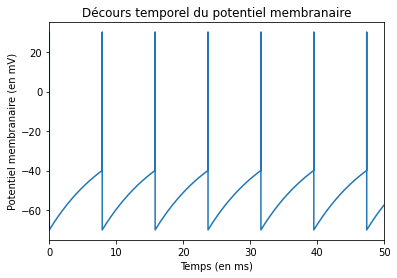

In [91]:
def comp_V(V_reset=-70,V_thr = -40,V_spike=30,tau_m = 10,E_L = -65,RI_in = 50,V_0 = -25,temps_max=50,t=0,dt = 0.05):
    #Préparation des vecteurs utilisés
    potentiel=[]
    temps=[]
    #Boucles
    V = V_0
    while t < temps_max:
        if V==V_spike:
            V=V_reset
            potentiel.append(V)
            temps.append(t)
        elif V>V_thr:
            V=V_spike
            potentiel.append(V)
            temps.append(t)
        else:
            V += dt * (-V + E_L + RI_in) / tau_m
            t += dt
            potentiel.append(V)
            temps.append(t)
    return potentiel,temps
Volt,Tps=comp_V()
fig, ax = plt.subplots()
ax.plot(Tps,Volt)
ax.set_xlabel("Temps (en ms)")
ax.set_ylabel("Potentiel membranaire (en mV)")
ax.set_title("Décours temporel du potentiel membranaire")
ax.set_xlim(0,temps_max)
ax.set_ylim(-75,35)
plt.show()

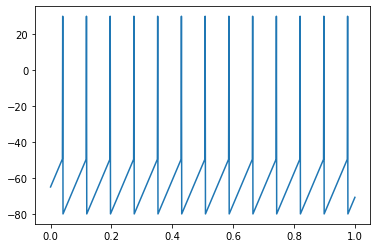

In [73]:
def compute_V(dt=0.01,tau_m=10,V_0=-65,I_inp=200,
              V_thr=-49,V_spike=30,V_reset=-80,
              R_m=20,time=1,V_repos=-65): 
    V1 = [V_0]
    Time=[0]
    for t in range(int(time/dt)):
        dv1=dt*(-V1[t]+V_repos+R_m*I_inp)/tau_m
        Time.append(Time[t]+dt)
        nv1=V1[t]+dv1
        if nv1>V_thr:
            V1[t]=V_spike
            nv1=V_reset
        V1.append(nv1)
    return V1,Time
Volt1,Tps1 = compute_V()
plt.plot(Tps1,Volt1)
plt.show()

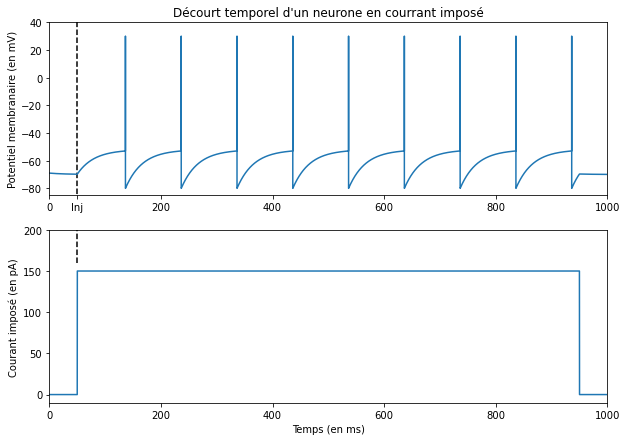

In [74]:
dt=0.01
time=np.arange(0,1000,dt)
#Courant imposé
def Inp(time=time, start=50, end=950, value=150):
    I = np.zeros_like(time)
    I[time>start] = value
    I[time>end] = 0
    return I
I = Inp(time)
#Enregistrement du potentiel
def leaky_IF(time=time, inp=I, tau=30, v0=-69, R=0.12, 
             Vthreshold=-53, Vreset=-80, Vspike=30, 
             VRest=-70):
    V = np.ones_like(time)*v0
    dt = time[1]
    for t in range(len(time)-1):
        dV = dt * (-(V[t] - VRest) + R*inp[t])/tau
        V[t+1] = V[t] + dV
        if V[t]>Vthreshold:
            V[t+1] = Vspike
        if V[t] == Vspike:
            V[t+1] = Vreset
    return V
V=leaky_IF()
#Graphique
fig,ax=plt.subplots(2,figsize=(10,7))
ax[0].plot(time,V)
ax[0].set_title("Décourt temporel d'un neurone en courrant imposé")
ax[0].set_ylabel("Potentiel membranaire (en mV)")
ax[0].set_ylim(-85,40)
ax[0].set_xlim(0,1000)
ax[0].vlines(50,-90,45,'black','--')
ax[0].set_xticks([0,50,200,400,600,800,1000])
ax[0].set_xticklabels([0,"Inj",200,400,600,800,1000])
ax[1].plot(time,I)
ax[1].set_ylim(-10,200)
ax[1].set_ylabel("Courant imposé (en pA)")
ax[1].set_xlim(0,1000)
ax[1].vlines(50,160,210,'black','--')
ax[1].set_xlabel("Temps (en ms)")
plt.show()

In [113]:
def compute_V(dt=0.001,tau_m=10,V_0=-65,I_inp=200,
              V_thr=-49,V_spike=30,V_reset=-80,
              R_m=20,time=1,V_repos=-65): 
    V = [V_0]
    Time=[0]
    for t in range(int(time/dt)):
        dv=dt*(-V[t]+V_repos+R_m*I_inp)/tau_m
        Time.append(Time[t]+dt)
        nv=V[t]+dv
        if nv>V_thr:
            V[t]=V_spike
            nv=V_reset
        V.append(nv)
    return V,Time

def fir_rate(Input=100):
    v,tps=compute_V(I_inp=Input)
    spike=0
    for i in v:
        if i==30:
            spike+=1
    return spike/len(tps)

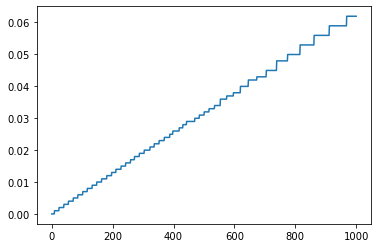

In [116]:
freq=[]
INP=np.arange(0,1001,1)
for inp in INP:
    freq.append(fir_rate(Input=inp))
fig,ax=plt.subplots()
ax.plot(INP,freq)